<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/11_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [2]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=250,noise=0.25,random_state=42)

In [3]:
X.shape[1]

2

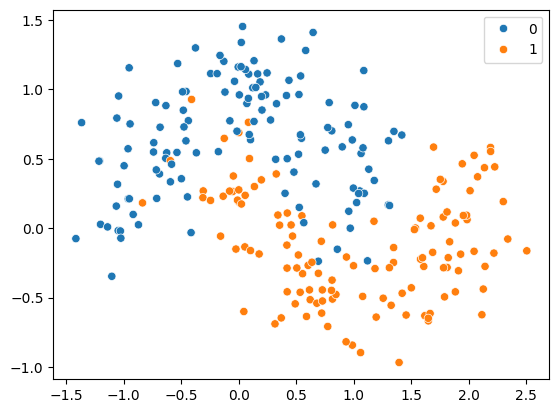

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [5]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=X.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
adam=Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,validation_split=0.2,verbose=0,epochs=800)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Axes: >

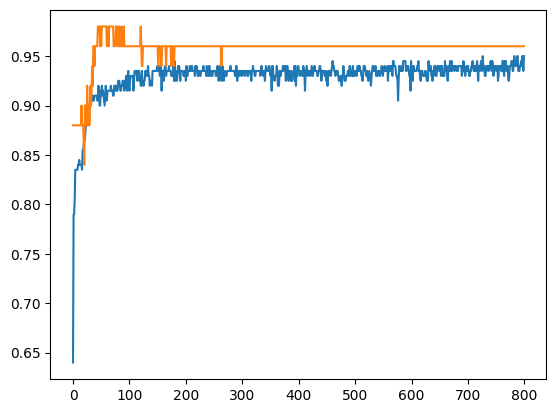

In [6]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])

<Axes: >

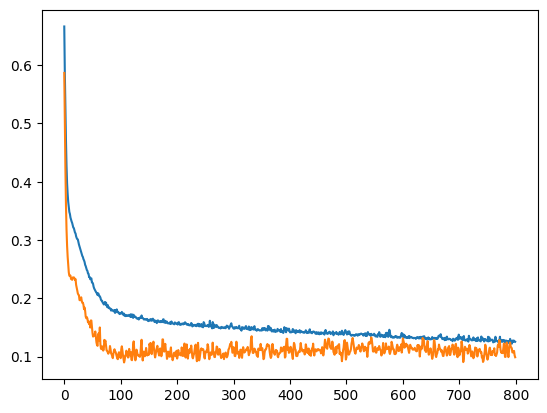

In [7]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])

In [8]:
l1=l1(0.001)
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=X.shape[1],kernel_regularizer=l1))
model1.add(Dense(128,activation='relu',kernel_regularizer=l1))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history1=model1.fit(X,y,validation_split=0.2,epochs=800,verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

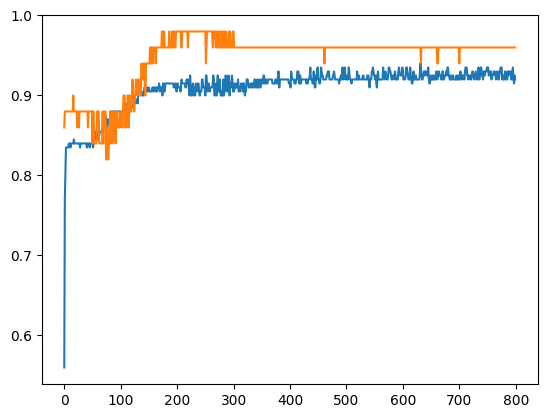

In [10]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['val_accuracy'])
plt.show()

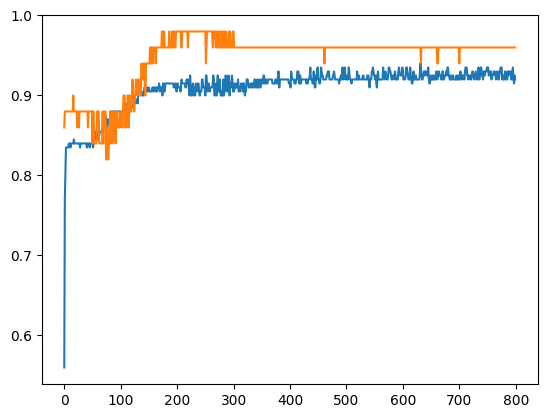

In [11]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['val_accuracy'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


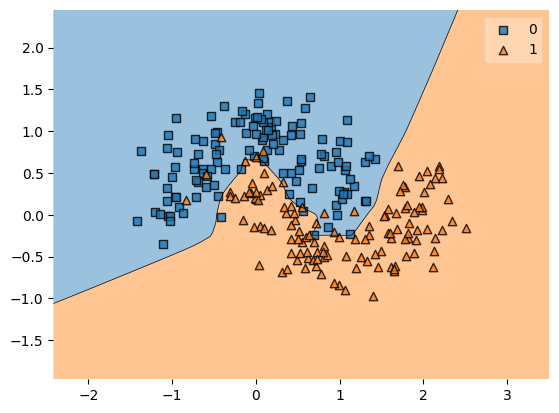

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


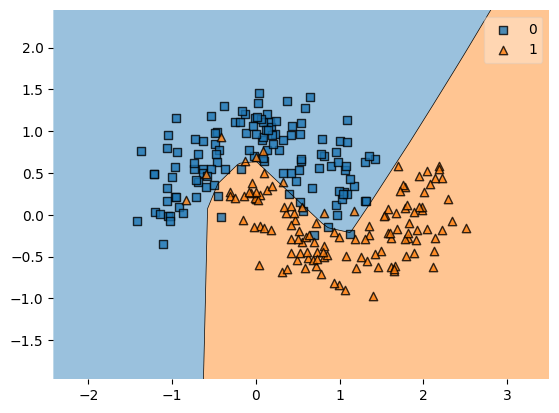

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model1)
plt.show()

In [27]:
old_weight=model.get_weights()[0].reshape(256)
new_weight=model1.get_weights()[0].reshape(256)

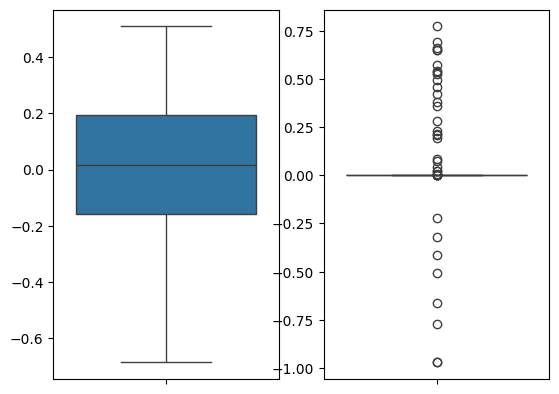

In [28]:
plt.subplot(1,2,1)
sns.boxplot(old_weight)
plt.subplot(1,2,2)
sns.boxplot(new_weight)

plt.show()

/tmp/ipython-input-3649508057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(old_weight)
/tmp/ipython-input-3649508057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_weight)


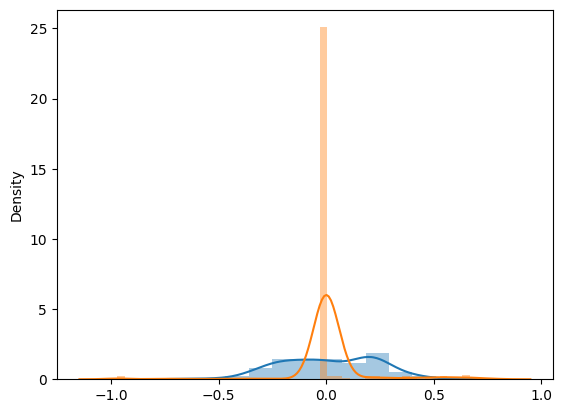

In [31]:
sns.distplot(old_weight)
sns.distplot(new_weight)

plt.show()

In [34]:
old_weight.min(),new_weight.min()

(np.float32(-0.68709457), np.float32(-0.97094125))